In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = "NASA-promise-dataset-repository-main/cm1.csv"

In [3]:
df=pd.read_csv(datapath)

In [4]:
df = df[~df.isin(['?']).any(axis=1)]

In [5]:
X =df.drop(["defects"],axis=1)

In [6]:
y = df[["defects"]]

In [7]:
Y_numeric = y.astype(int)

In [8]:
Y_numeric.head()

,defects
0,0
1,1
2,0
3,0
4,0


In [9]:
Y_numeric.values.reshape(1, -1).flatten()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
Y_numeric[Y_numeric == '?'] = np.nan

In [11]:
X_clean = X[~np.isnan(Y_numeric)]
Y_clean = Y_numeric[~np.isnan(Y_numeric)]

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(Y_numeric)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X_imputed,y_imputed,test_size=0.3,random_state=42)

In [15]:
import tensorflow as tf
from tensorflow.keras import __version__

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {__version__}")

TensorFlow Version: 2.16.1
Keras Version: 3.3.3


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(LSTM(64, input_shape=(10, 1)))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamW', metrics=['accuracy'])

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

model.fit(x_train, y_train, batch_size=8, epochs=200)

loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy}")

Epoch 1/200


C:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5505 - loss: 0.6427
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9018 - loss: 0.2936
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9113 - loss: 0.2840
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8856 - loss: 0.3314
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9237 - loss: 0.2424
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9043 - loss: 0.2998
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9088 - loss: 0.2820
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9001 - loss: 0.2774
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9013 - loss: 0.2695
Epoch 10/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9010 - loss: 0.2782
Epoch 11/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9164 - loss: 0.2553
Epoch 12/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9018 - lo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[126   8]
 [ 15   1]]


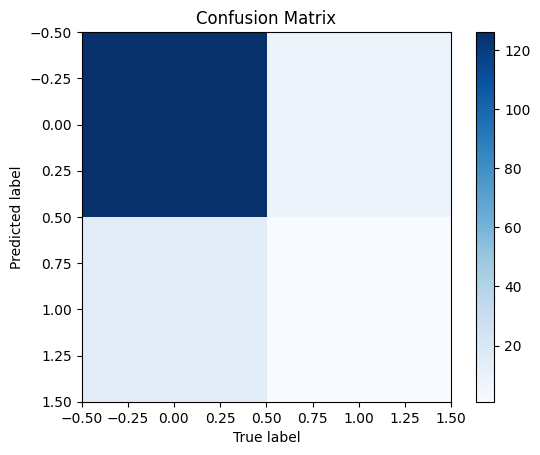

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred = tf.round(y_pred).numpy()
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [18]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       134
         1.0       0.11      0.06      0.08        16

    accuracy                           0.85       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.81      0.85      0.83       150



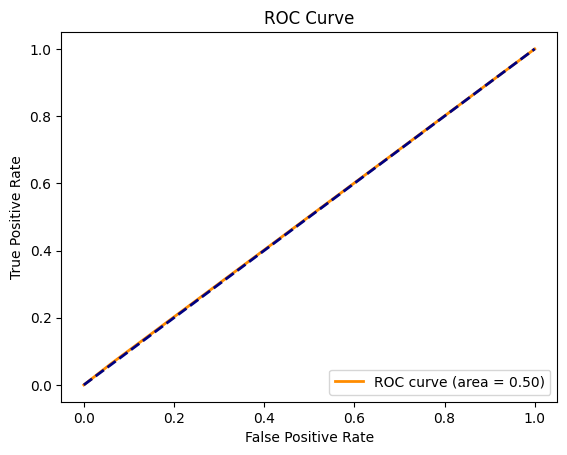

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

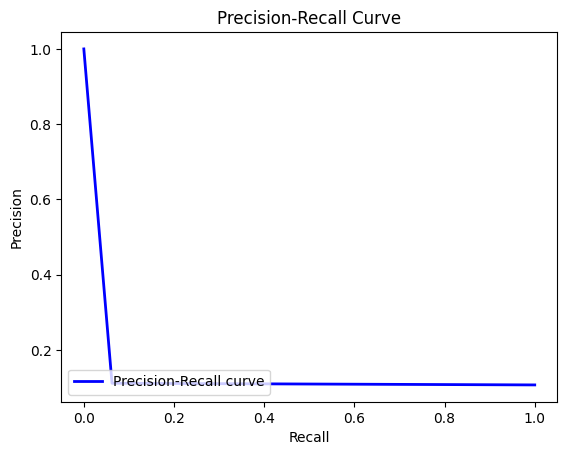

In [20]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = "NASA-promise-dataset-repository-main/kc1.csv"

In [3]:
df=pd.read_csv(datapath)

In [4]:
df = df[~df.isin(['?']).any(axis=1)]

In [5]:
X =df.drop(["defects"],axis=1)

In [6]:
y = df[["defects"]]

In [7]:
Y_numeric = y.astype(int)

In [8]:
Y_numeric.values.reshape(1, -1).flatten()

array([0, 1, 1, ..., 0, 0, 0])

In [9]:
Y_numeric[Y_numeric == '?'] = np.nan

In [10]:
X_clean = X[~np.isnan(Y_numeric)]
Y_clean = Y_numeric[~np.isnan(Y_numeric)]

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(Y_numeric)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X_imputed,y_imputed,test_size=0.3,random_state=42)

In [14]:
import tensorflow as tf
from tensorflow.keras import __version__

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {__version__}")

TensorFlow Version: 2.16.1
Keras Version: 3.3.3


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(LSTM(64, input_shape=(10, 1)))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamW', metrics=['accuracy'])

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

model.fit(x_train, y_train, batch_size=8, epochs=200)

loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy}")

Epoch 1/200


C:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8391 - loss: 0.4154
Epoch 2/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8577 - loss: 0.3352
Epoch 3/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8494 - loss: 0.3558
Epoch 4/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8496 - loss: 0.3627
Epoch 5/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8574 - loss: 0.3279
Epoch 6/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8514 - loss: 0.3584
Epoch 7/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8528 - loss: 0.3492
Epoch 8/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8485 - loss: 0.3488
Epoch 9/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8504 - loss: 0.3618
Epoch 10/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8499 - loss: 0.3338
Epoch 11/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8438 - loss: 0.3586
Epoch 12/200
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
[[494  39]
 [ 62  38]]


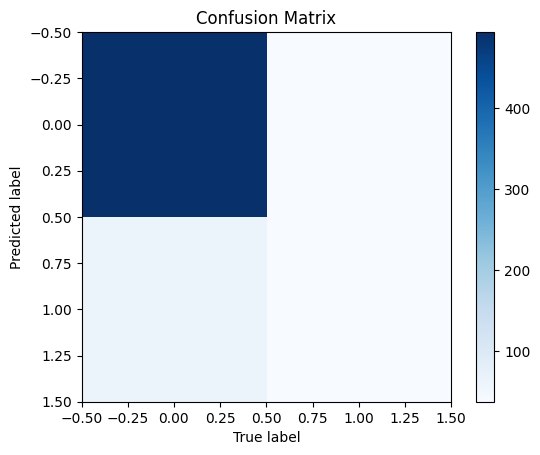

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred = tf.round(y_pred).numpy()
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [17]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       533
         1.0       0.49      0.38      0.43       100

    accuracy                           0.84       633
   macro avg       0.69      0.65      0.67       633
weighted avg       0.83      0.84      0.83       633



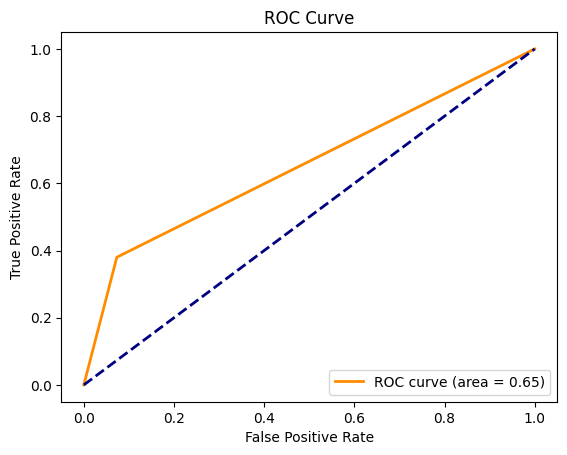

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

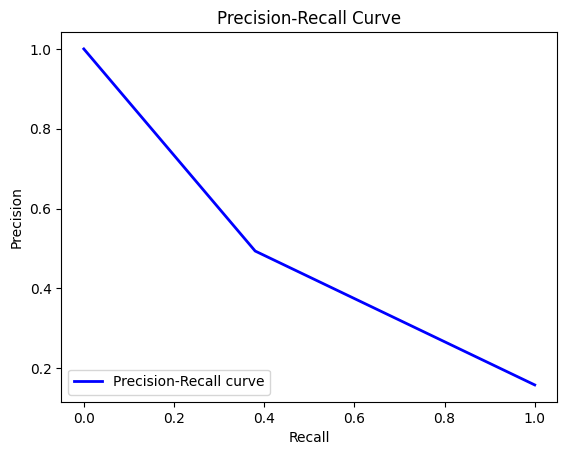

In [19]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = "NASA-promise-dataset-repository-main/jm1.csv"

In [3]:
df=pd.read_csv(datapath)

In [4]:
df = df[~df.isin(['?']).any(axis=1)]

In [5]:
X =df.drop(["defects"],axis=1)

In [6]:
y = df[["defects"]]

In [7]:
Y_numeric = y.astype(int)

In [8]:
Y_numeric.head()

,defects
0,0
1,1
2,1
3,1
4,1


In [9]:
Y_numeric.values.reshape(1, -1).flatten()

array([0, 1, 1, ..., 0, 0, 0])

In [10]:
Y_numeric[Y_numeric == '?'] = np.nan

In [11]:
X_clean = X[~np.isnan(Y_numeric)]
Y_clean = Y_numeric[~np.isnan(Y_numeric)]

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(Y_numeric)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X_imputed,y_imputed,test_size=0.3,random_state=42)

In [15]:
import tensorflow as tf
from tensorflow.keras import __version__

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {__version__}")

TensorFlow Version: 2.16.1
Keras Version: 3.3.3


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(LSTM(64, input_shape=(10, 1)))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamW', metrics=['accuracy'])

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

model.fit(x_train, y_train, batch_size=8, epochs=200)

loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy}")

C:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8362 - loss: 0.4263
Epoch 2/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8529 - loss: 0.3859
Epoch 3/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8457 - loss: 0.3947
Epoch 4/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8497 - loss: 0.3881
Epoch 5/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8417 - loss: 0.4012
Epoch 6/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8406 - loss: 0.4027
Epoch 7/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8495 - loss: 0.3853
Epoch 8/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8490 - loss: 0.3839
Epoch 9/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8421 - loss: 0.3958
Epoch 10/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8454 - loss: 0.3923
Epoch 11/200
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8544 - loss: 0.3760
Epoch 12/200
1156/

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[3089  242]
 [ 459  172]]


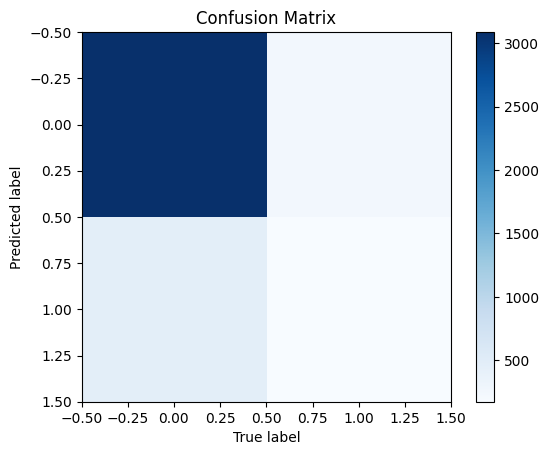

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred = tf.round(y_pred).numpy()
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [18]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      3331
         1.0       0.42      0.27      0.33       631

    accuracy                           0.82      3962
   macro avg       0.64      0.60      0.61      3962
weighted avg       0.80      0.82      0.81      3962



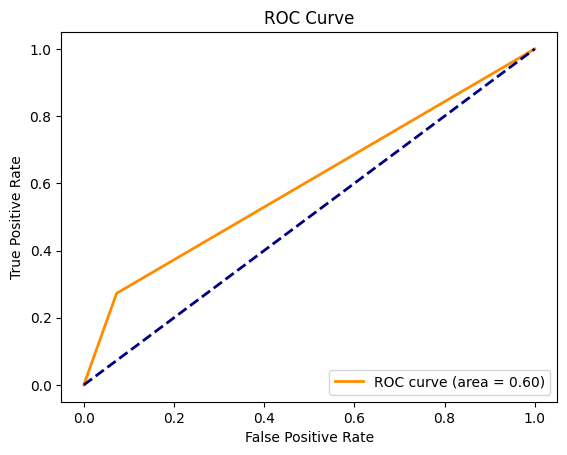

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

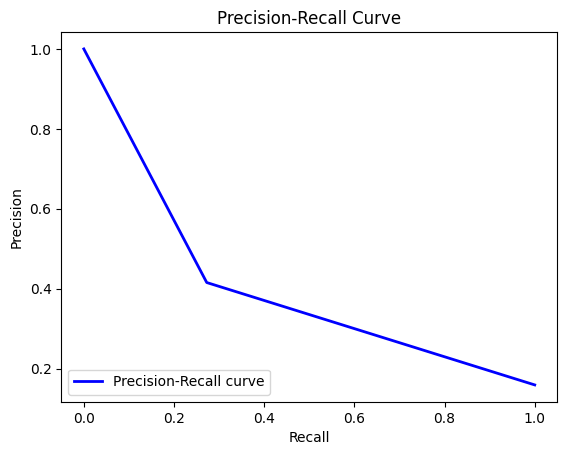

In [20]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = "NASA-promise-dataset-repository-main/kc2.csv"

In [3]:
df=pd.read_csv(datapath)

In [4]:
df = df[~df.isin(['?']).any(axis=1)]

In [5]:
value_map = {"no": 0, "yes": 1}
df['problems'] = df['problems'].replace(value_map)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_2292\2432034615.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['problems'] = df['problems'].replace(value_map)


In [6]:
X =df.drop(["problems"],axis=1)

In [7]:
y = df[["problems"]]

In [8]:
Y_numeric = y.astype(int)

In [9]:
Y_numeric.head()

,problems
0,0
1,1
2,1
3,1
4,1


In [10]:
Y_numeric.values.reshape(1, -1).flatten()

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
Y_numeric[Y_numeric == '?'] = np.nan

In [12]:
X_clean = X[~np.isnan(Y_numeric)]
Y_clean = Y_numeric[~np.isnan(Y_numeric)]

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(Y_numeric)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X_imputed,y_imputed,test_size=0.3,random_state=42)

In [16]:
import tensorflow as tf
from tensorflow.keras import __version__

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {__version__}")

TensorFlow Version: 2.16.1
Keras Version: 3.3.3


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(LSTM(64, input_shape=(10, 1)))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamW', metrics=['accuracy'])

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

model.fit(x_train, y_train, batch_size=16, epochs=200)

loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy}")

C:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5609 - loss: 0.6391
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7824 - loss: 0.4230
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8144 - loss: 0.3599
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8211 - loss: 0.3773
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8341 - loss: 0.3372
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8210 - loss: 0.3434
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8099 - loss: 0.3354
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8142 - loss: 0.3456
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8356 - loss: 0.3458
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8608 - loss: 0.3525
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8383 - loss: 0.3322
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accurac

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[115  11]
 [ 18  13]]


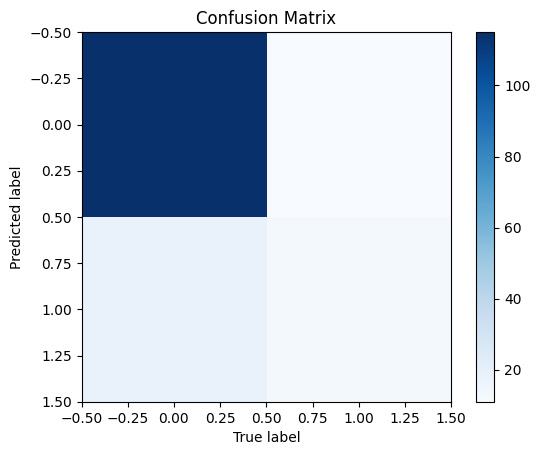

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred = tf.round(y_pred).numpy()
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [24]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       126
         1.0       0.54      0.42      0.47        31

    accuracy                           0.82       157
   macro avg       0.70      0.67      0.68       157
weighted avg       0.80      0.82      0.81       157



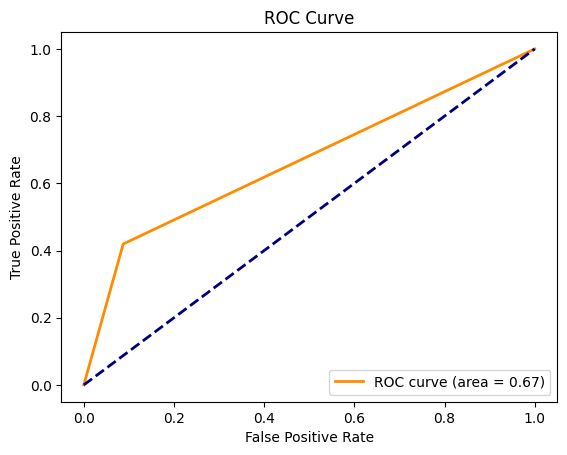

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

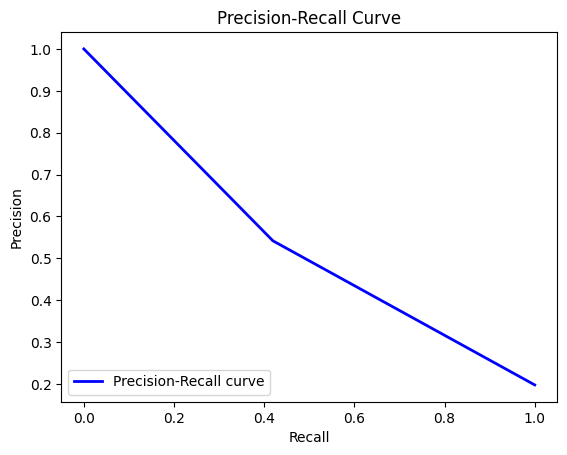

In [26]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = "NASA-promise-dataset-repository-main/pc1.csv"

In [3]:
df=pd.read_csv(datapath)

In [5]:
df = df[~df.isin(['?']).any(axis=1)]

In [10]:
X =df.drop(["defects"],axis=1)

In [11]:
y = df[["defects"]]

In [13]:
Y_numeric = y.astype(int)

In [14]:
Y_numeric.head()

,defects
0,0
1,1
2,1
3,1
4,1


In [15]:
Y_numeric.values.reshape(1, -1).flatten()

array([0, 1, 1, ..., 0, 0, 0])

In [16]:
Y_numeric[Y_numeric == '?'] = np.nan

In [17]:
X_clean = X[~np.isnan(Y_numeric)]
Y_clean = Y_numeric[~np.isnan(Y_numeric)]

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(Y_numeric)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X_imputed,y_imputed,test_size=0.3,random_state=42)

In [21]:
import tensorflow as tf
from tensorflow.keras import __version__

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {__version__}")

TensorFlow Version: 2.16.1
Keras Version: 3.3.3


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(LSTM(64, input_shape=(10, 1)))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamW', metrics=['accuracy'])

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

model.fit(x_train, y_train, batch_size=8, epochs=200)

loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy}")

C:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9431 - loss: 0.2737
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9383 - loss: 0.2204
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9557 - loss: 0.1649
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9475 - loss: 0.1985
Epoch 5/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9445 - loss: 0.1981
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9390 - loss: 0.1944
Epoch 7/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9352 - loss: 0.2105
Epoch 8/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9324 - loss: 0.2217
Epoch 9/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9355 - loss: 0.1951
Epoch 10/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9535 - loss: 0.1668
Epoch 11/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9429 - loss: 0.1861
Epoch 12/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy:

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
[[301   5]
 [ 16  11]]


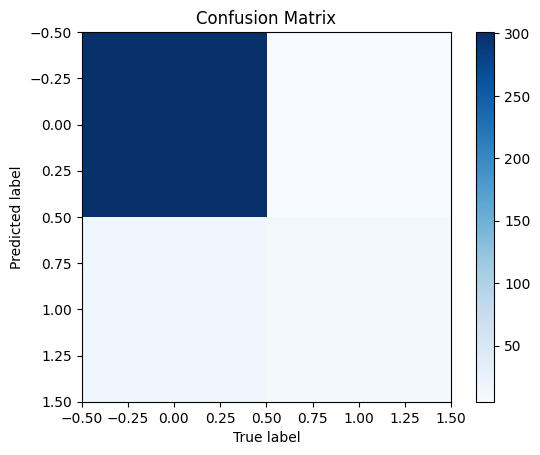

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred = tf.round(y_pred).numpy()
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [25]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       306
         1.0       0.69      0.41      0.51        27

    accuracy                           0.94       333
   macro avg       0.82      0.70      0.74       333
weighted avg       0.93      0.94      0.93       333



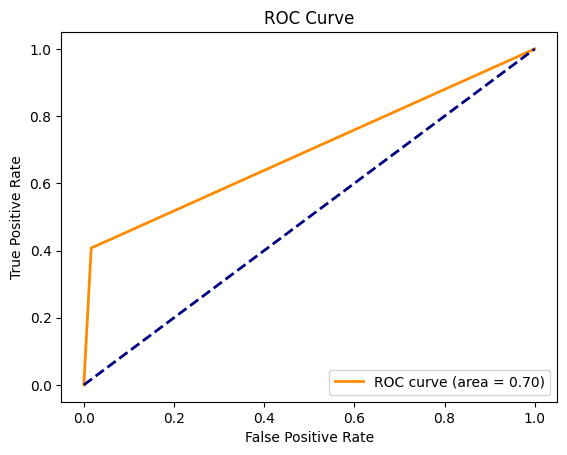

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

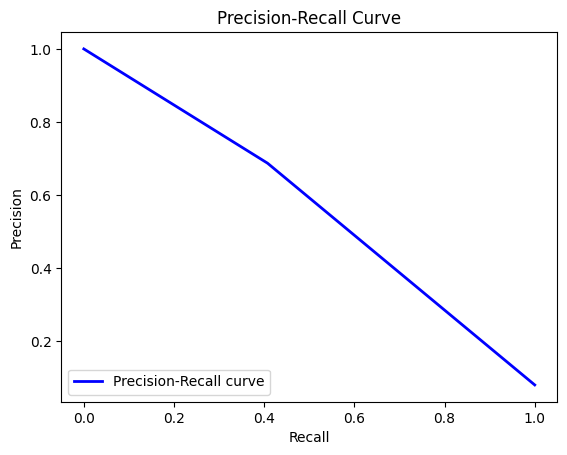

In [27]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()